# Kaggle - Web Traffic Time Series Forecasting

## Model 04 - Neural Network v2 - Weekday

by Louis Yang

Based on the result from "explore_data_6.ipynb" with weekday alignment for learning

In [1]:
model_name = 'model_04_neural_network_2_weekday'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Input

In [3]:
print('%%% Reading data train_1.csv ... ', end = '', flush = True)
input_df = pd.read_csv("../data/train_1.csv")
print('done!')

%%% Reading data train_1.csv ... done!


In [4]:
input_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [5]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


## Processing Data
Generate training set and test (predict) set

### Day of week alignment

In [7]:
from datetime import datetime

In [10]:
datetime.strptime('2017-01-01','%Y-%m-%d').weekday()

6

We need to predict output (Y_output_pred) start from Sunday (6) for data set 1. (0: Monday, 6: Sunday)

In [18]:
# We take the x_length + y_length days of data only
# This part then split into x_length as input X and y_length as output Y
x_length = 60  # input period
y_length = 60  # predict period

In [20]:
input_df.columns[-y_length]

'2016-11-02'

In [21]:
datetime.strptime(input_df.columns[-y_length],'%Y-%m-%d').weekday()

2

The original proposed training output (Y_train) starts from Wednesday (2).

In [22]:
day_shift = 3
input_df.columns[-y_length-day_shift]

'2016-10-30'

In [23]:
datetime.strptime(input_df.columns[-y_length-day_shift],'%Y-%m-%d').weekday()

6

Shift the training output (Y_train) window 3 days forward so that the starting day is Sunday.

### Data range reduce
Keep only the last x_length + y_length + day_shift days of data

where x_length = 60, y_length = 60, day_shift = 3 by default fro training set 1.

In [24]:
input_df = input_df[['Page']+list(input_df.columns[-x_length-y_length-day_shift:])]

In [25]:
input_df

,Page,2016-08-31,2016-09-01,2016-09-02,2016-09-03,2016-09-04,2016-09-05,2016-09-06,2016-09-07,2016-09-08,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,25.0,21.0,20.0,25.0,19.0,23.0,18.0,19.0,18.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,31.0,31.0,17.0,66.0,78.0,19.0,44.0,43.0,35.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,2.0,5.0,7.0,5.0,2.0,7.0,6.0,11.0,10.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,9.0,14.0,14.0,9.0,16.0,11.0,7.0,14.0,13.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2.0,4.0,3.0,39.0,4.0,3.0,1.0,5.0,5.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,9.0,19.0,19.0,16.0,13.0,17.0,16.0,17.0,16.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,14.0,11.0,32.0,54.0,65.0,22.0,28.0,21.0,12.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,77.0,87.0,91.0,23.0,48.0,87.0,37.0,35.0,53.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,27.0,26.0,29.0,22.0,35.0,22.0,31.0,24.0,34.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,23.0,32.0,23.0,14.0,22.0,24.0,28.0,21.0,28.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [26]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 124 entries, Page to 2016-12-31
dtypes: float64(123), object(1)
memory usage: 137.2+ MB


In [44]:
input_data = input_df[list(input_df.columns[1:])].values; input_data

array([[ 25.,  21.,  20., ...,  19.,  18.,  20.],
       [ 31.,  31.,  17., ...,  45.,  26.,  20.],
       [  2.,   5.,   7., ...,   3.,   4.,  17.],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [45]:
input_data_num = np.nan_to_num(input_data); input_data_num

array([[ 25.,  21.,  20., ...,  19.,  18.,  20.],
       [ 31.,  31.,  17., ...,  45.,  26.,  20.],
       [  2.,   5.,   7., ...,   3.,   4.,  17.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

### View

In [29]:
def view(x, xlim=None, ylim=None, yscale='linear'):
    plt.yscale(yscale)
    plt.plot(x)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.show()
def examine(X, view_n=5):
    '''randomly show some example in feature and label'''
    n_X = len(X)
    view_list = np.random.choice(n_X, min(view_n, n_X), replace=False)
    for i in view_list:
        view(X[i])
        print('i = ',i)

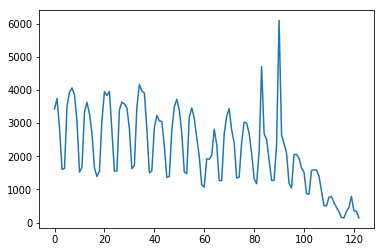

i =  70365


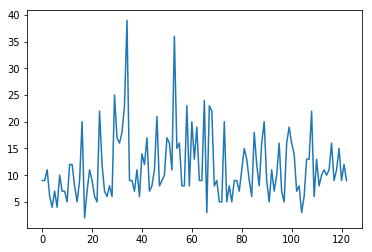

i =  123927


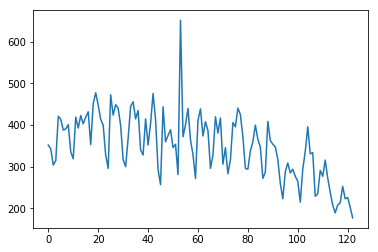

i =  140078


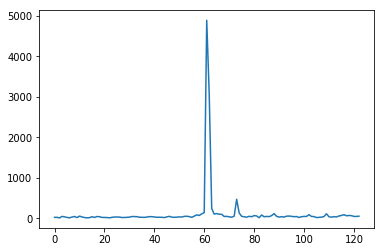

i =  115677


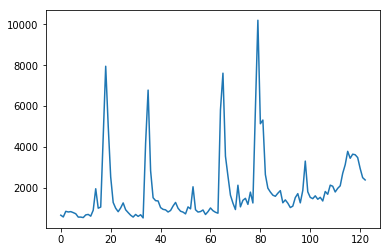

i =  72830


In [46]:
examine(input_data)

### Log

In [31]:
def log(X):
    return np.log10(X + 0.1)
def unlog(X):
    return np.clip(np.power(10., X) - 0.1, 0.0, None)

In [47]:
input_data_log = log(input_data_num); input_data_log

array([[ 1.39967372,  1.32428246,  1.30319606, ...,  1.28103337,
         1.25767857,  1.30319606],
       [ 1.49276039,  1.49276039,  1.23299611, ...,  1.65417654,
         1.41664051,  1.30319606],
       [ 0.32221929,  0.70757018,  0.85125835, ...,  0.49136169,
         0.61278386,  1.23299611],
       ..., 
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [48]:
input_data_log.shape, input_data.shape

((145063, 123), (145063, 123))

In [49]:
# Check inverse log transformation
input_data_log_tt = unlog(input_data_log)
input_data_log_tt_dif = input_data_log_tt - input_data_num
input_data_log_tt_dif.min(), input_data_log_tt_dif.max()

(-2.9802322387695313e-08, 2.6077032089233398e-08)

### Normalization (Shift and Scale)

In [50]:
input_center = np.nanmedian(input_data_log, axis=-1).reshape(-1,1)
input_center  # remember sample-wised center

array([[ 1.25767857],
       [ 1.34439227],
       [ 0.61278386],
       ..., 
       [-1.        ],
       [-1.        ],
       [-1.        ]])

In [51]:
input_scale = np.nanstd(input_data_log, axis=-1).reshape(-1,1)
input_scale[input_scale == 0.0] = 1.0  # Prevent divid by zero
input_scale  # remember sample-wised scale

array([[ 0.2365272 ],
       [ 0.2847919 ],
       [ 0.36369067],
       ..., 
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [37]:
# Check if there is any 0. in input_scale
[i for i in range(len(input_scale)) if input_scale[i] == 0.]

[]

In [38]:
def transform(data_ori, center, scale):
    return (data_ori - center) / scale
def untransform(data, center, scale):
    return data * scale + center

In [52]:
# Normalize the input_data
input_data_norm = transform(input_data_log, input_center, input_scale)

In [40]:
def check_nan(X):
    return [x for x in X if np.isnan(x).any()]

In [53]:
check_nan(input_data_norm)  # Check if there is any nan in the input_data

[]

### Remove the all-nan data

In [ ]:
# Not implement yet

### Make (X,Y) pairs data from data set

In [42]:
def make_XY(data, x_length=x_length, y_length=y_length, shift=day_shift):
    return data[:, -x_length-y_length-shift:-y_length-shift], data[:, -y_length-shift:-shift]

In [54]:
X_input, Y_input = make_XY(input_data_norm)
X_input.shape, Y_input.shape

((145063, 60), (145063, 60))

In [55]:
X_output = input_data_norm[:, -x_length:]
X_output.shape

(145063, 60)

### Split Data into Training and Cross Validation Sets

In [56]:
def make_shuffle_index(n, seed=None):
    shuffle_index = np.array(list(range(n)))
    np.random.seed(seed)  # you can fix the initial seed for comparison purpose
    np.random.shuffle(shuffle_index)
    return shuffle_index

In [57]:
def using(array_ori, index_list):
    #return np.array([array_ori[i] for i in index_list])
    return np.take(array_ori, index_list, axis=0)

In [58]:
# Generate a shuffle list
shuffle_index = make_shuffle_index(len(X_input), seed=123)

Keep 10% of input data as validation set

In [59]:
# Split the index list into training and validation sets
n_val = int(len(X_input) * 0.1)
val_index = shuffle_index[:n_val]
train_index = shuffle_index[n_val:]

In [60]:
# Split the data sets according to the index list
X_train = using(X_input, train_index)
Y_train = using(Y_input, train_index)
X_val = using(X_input, val_index)
Y_val = using(Y_input, val_index)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((130557, 60), (130557, 60), (14506, 60), (14506, 60))

#### Split the untransformed data
Split the untransformed data in the same way for score estimation

In [61]:
train_data_num = using(input_data_num, train_index)
val_data_num = using(input_data_num, val_index)

In [62]:
X_train_ori, Y_train_ori = make_XY(train_data_num)
X_val_ori, Y_val_ori = make_XY(val_data_num)
X_train_ori.shape, Y_train_ori.shape, X_val_ori.shape, Y_val_ori.shape

((130557, 60), (130557, 60), (14506, 60), (14506, 60))

In [63]:
train_center = using(input_center, train_index)
val_center = using(input_center, val_index)
train_scale = using(input_scale, train_index)
val_scale = using(input_scale, val_index)
train_center.shape, val_center.shape, train_scale.shape, val_scale.shape

((130557, 1), (14506, 1), (130557, 1), (14506, 1))

#### Check if the inverse transformation is correct

In [64]:
# Undo transformation
X_train_tt = unlog(untransform(X_train, train_center, train_scale))

In [65]:
X_train_tt_diff = X_train_tt - X_train_ori
X_train_tt_diff.min(), X_train_tt_diff.max()

(-2.9802322387695313e-08, 2.6077032089233398e-08)

## Neural Network?

In [66]:
from keras.models import Sequential
#from keras.layers import Conv1D
from keras.layers import Dense, Dropout, Flatten
from keras.losses import mean_squared_error
from keras.optimizers import Adam

Using TensorFlow backend.


### SMAPE
Symmetric mean absolute percentage error

https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

In [67]:
import keras.backend as K

def k_smape(y_true, y_pred):
    '''Symmetric mean absolute percentage error for keras metric'''
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true) + K.abs(y_pred),
                                            K.epsilon(),
                                            None))
    return 200. * K.mean(diff, axis=-1)

In [68]:
def smape(y_true, y_pred, axis=None):
    '''Symmetric mean absolute percentage error'''
    diff = np.abs((y_true - y_pred) / 
                  np.clip(np.abs(y_true) + np.abs(y_pred), K.epsilon(),
                          None))
    return 200. * np.mean(diff, axis=axis)

In [69]:
# Benchmark SMAPE on the transformed data
smape(Y_train,X_train), smape(Y_val,X_val), smape(Y_train,Y_train)

(154.72039654769159, 154.49792227495661, 0.0)

In [70]:
# Benchmark SMAPE on the original data
smape(Y_train_ori,X_train_ori), smape(Y_val_ori,X_val_ori), \
smape(Y_train_ori,Y_train_ori)

(59.670796554592641, 59.232335508515973, 0.0)

Doing better than the first two scores are better than simply copy and past the previous result.

### Neural Network Model
Simple 4 fully connected layers with dropout

In [71]:
from keras.models import Model
from keras.layers import Input

In [72]:
layer_0 = Input(shape=(x_length,))
layer_t = Dense(120, activation='relu')(layer_0)
layer_t = Dense(120, activation='relu')(layer_t)
layer_t = Dropout(0.25)(layer_t)
layer_t = Dense(120, activation='relu')(layer_t)
layer_t = Dropout(0.5)(layer_t)
layer_f = Dense(y_length)(layer_t)

In [73]:
model = Model(inputs=layer_0, outputs=layer_f)
model.compile(optimizer='adam',
              loss='mean_squared_error', metrics=[k_smape])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 60)                7260      
Total para

About 5s for 1 epoch on i5-750 CPU

In [74]:
hist = model.fit(X_train, Y_train, batch_size=128, epochs=100, 
                 validation_data=(X_val, Y_val))

Train on 130557 samples, validate on 14506 samples
Epoch 1/100
130557/130557 [==============================] - 4s - loss: 0.8554 - k_smape: 140.5908 - val_loss: 0.7806 - val_k_smape: 133.8280
Epoch 2/100
130557/130557 [==============================] - 4s - loss: 0.7990 - k_smape: 133.9510 - val_loss: 0.7648 - val_k_smape: 132.4014
Epoch 3/100
130557/130557 [==============================] - 4s - loss: 0.7866 - k_smape: 132.4708 - val_loss: 0.7571 - val_k_smape: 130.3037
Epoch 4/100
130557/130557 [==============================] - 4s - loss: 0.7795 - k_smape: 131.5749 - val_loss: 0.7541 - val_k_smape: 132.0365
Epoch 5/100
130557/130557 [==============================] - 4s - loss: 0.7751 - k_smape: 131.1358 - val_loss: 0.7497 - val_k_smape: 129.3497
Epoch 6/100
130557/130557 [==============================] - 4s - loss: 0.7716 - k_smape: 130.7483 - val_loss: 0.7479 - val_k_smape: 130.3066
Epoch 7/100
130557/130557 [==============================] - 4s - loss: 0.7687 - k_smape: 130.526

130557/130557 [==============================] - 4s - loss: 0.7452 - k_smape: 128.6315 - val_loss: 0.7328 - val_k_smape: 128.8636
Epoch 58/100
130557/130557 [==============================] - 4s - loss: 0.7460 - k_smape: 128.7822 - val_loss: 0.7299 - val_k_smape: 127.5329
Epoch 59/100
130557/130557 [==============================] - 4s - loss: 0.7455 - k_smape: 128.7573 - val_loss: 0.7294 - val_k_smape: 127.4339
Epoch 60/100
130557/130557 [==============================] - 4s - loss: 0.7451 - k_smape: 128.6854 - val_loss: 0.7320 - val_k_smape: 128.4265
Epoch 61/100
130557/130557 [==============================] - 4s - loss: 0.7455 - k_smape: 128.7816 - val_loss: 0.7313 - val_k_smape: 128.0199
Epoch 62/100
130557/130557 [==============================] - 4s - loss: 0.7450 - k_smape: 128.6711 - val_loss: 0.7308 - val_k_smape: 128.0965
Epoch 63/100
130557/130557 [==============================] - 4s - loss: 0.7449 - k_smape: 128.6051 - val_loss: 0.7325 - val_k_smape: 128.9148
Epoch 64/100

In [75]:
model.evaluate(X_val,Y_val)

12672/14506 [=========================>....] - ETA: 0s

[0.73183356898744467, 127.93464221583552]

### Training History

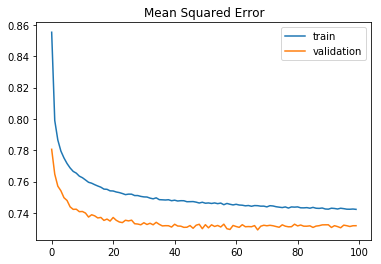

In [76]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Mean Squared Error')
plt.legend(); plt.show()

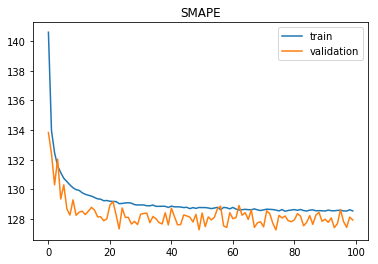

In [77]:
plt.plot(hist.history['k_smape'], label='train')
plt.plot(hist.history['val_k_smape'], label='validation')
plt.title('SMAPE')
plt.legend(); plt.show()

### Predict for Validation set

In [78]:
Y_val_pred = model.predict(X_val)

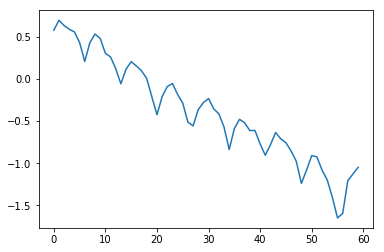

i =  10576


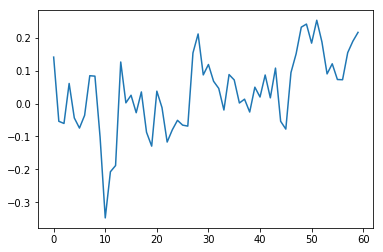

i =  6198


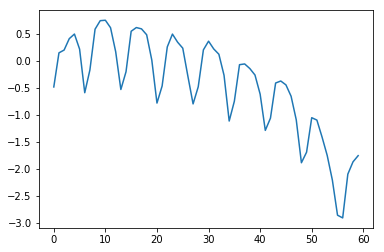

i =  8786


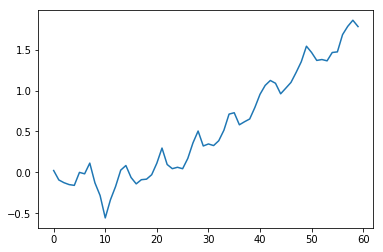

i =  6377


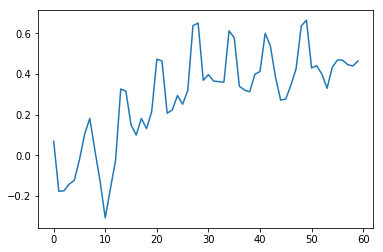

i =  778


In [79]:
examine(Y_val_pred)

In [80]:
Y_val_pred_ori = unlog(untransform(Y_val_pred, val_center, val_scale))

In [81]:
# SMAPE of the validation set
smape(Y_val_ori, Y_val_pred_ori)

38.526833953413664

In [82]:
def view_val(i):
    i = 26
    plt.plot(Y_val_pred_ori[i])
    plt.plot(Y_val_ori[i])
    plt.plot(X_val_ori[i])
    plt.show()

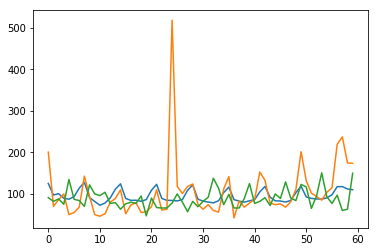

In [83]:
view_val(26)

### Predict for Output Set

In [84]:
Y_output_pred = model.predict(X_output)

In [85]:
Y_output_pred_ori = unlog(untransform(Y_output_pred, 
                                      input_center, input_scale))

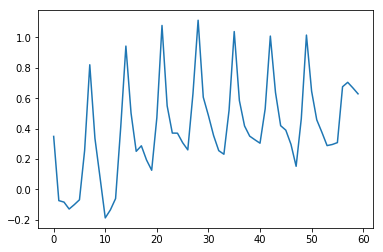

i =  97222


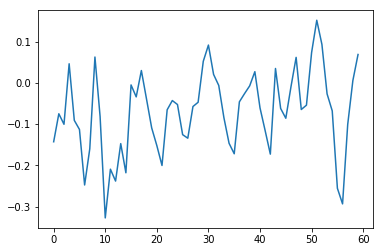

i =  143362


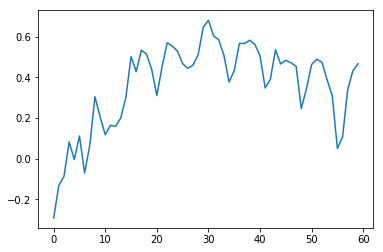

i =  91717


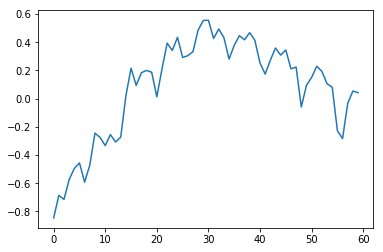

i =  72456


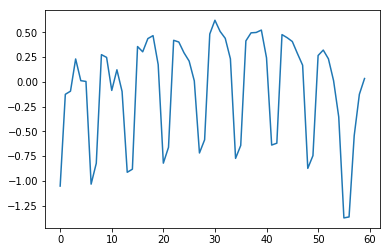

i =  42579


In [86]:
examine(Y_output_pred)

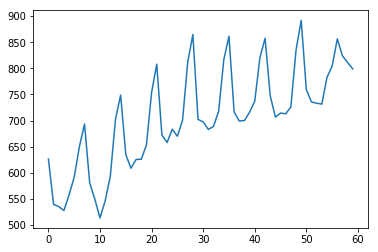

In [87]:
view(Y_output_pred_ori[28450])

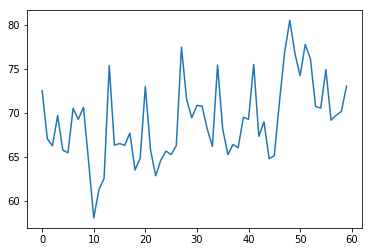

i =  128345


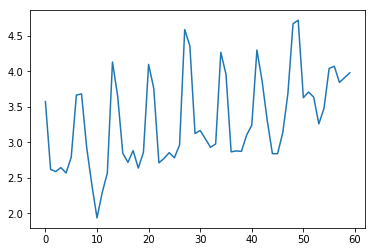

i =  112640


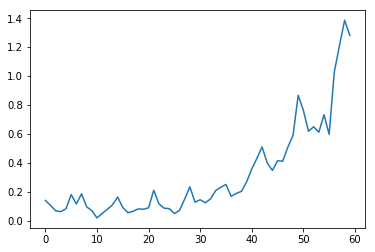

i =  90099


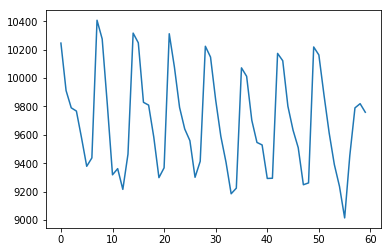

i =  40444


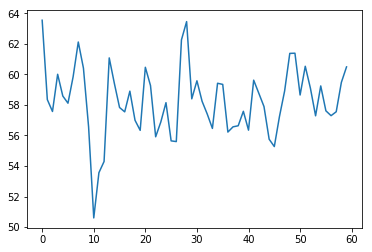

i =  34880


In [88]:
examine(Y_output_pred_ori)

## Output

In [90]:
print('%%% Reading data key_1.csv ...', end = '', flush = True)
output_df = pd.read_csv("../data/key_1.csv")
print('done!')

%%% Reading data key_1.csv ...done!


In [91]:
output_df['date'] = output_df.Page.apply(lambda a: a[-10:])  # take the last 10 characters from 'Page' as date
output_df['Page'] = output_df.Page.apply(lambda a: a[:-11])  # remove the last 10 caharacters from 'Page'
output_df['date'] = output_df['date'].astype('datetime64[ns]')  # convert 'date' string to numpy datetime format
#test['weekday'] = test.date.dt.dayofweek  # find the day of week using the 'date' column
output_df

,Page,Id,date
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05
5,!vote_en.wikipedia.org_all-access_all-agents,48f1e93517a2,2017-01-06
6,!vote_en.wikipedia.org_all-access_all-agents,5def418fcb36,2017-01-07
7,!vote_en.wikipedia.org_all-access_all-agents,77bd08134351,2017-01-08
8,!vote_en.wikipedia.org_all-access_all-agents,5889e6dbb16f,2017-01-09
9,!vote_en.wikipedia.org_all-access_all-agents,5f21fef1d764,2017-01-10


In [92]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703780 entries, 0 to 8703779
Data columns (total 3 columns):
Page    object
Id      object
date    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 199.2+ MB


In [96]:
output_df['date'].values[0:62]  # Make sure the range is 60 days (see if the dates resume after 60)

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
       '2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
       '2017-01-07T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-09T00:00:00.000000000', '2017-01-10T00:00:00.000000000',
       '2017-01-11T00:00:00.000000000', '2017-01-12T00:00:00.000000000',
       '2017-01-13T00:00:00.000000000', '2017-01-14T00:00:00.000000000',
       '2017-01-15T00:00:00.000000000', '2017-01-16T00:00:00.000000000',
       '2017-01-17T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-19T00:00:00.000000000', '2017-01-20T00:00:00.000000000',
       '2017-01-21T00:00:00.000000000', '2017-01-22T00:00:00.000000000',
       '2017-01-23T00:00:00.000000000', '2017-01-24T00:00:00.000000000',
       '2017-01-25T00:00:00.000000000', '2017-01-26T00:00:00.000000000',
       '2017-01-27T00:00:00.000000000', '2017-01-28

In [97]:
predict_dates_index=pd.date_range('2017-01-01', 
                                  periods=np.timedelta64(60,'D'), 
                                  freq = 'D', unit = 'D')
predict_dates_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
      

In [98]:
result_df = pd.DataFrame(Y_output_pred_ori, columns = predict_dates_index)
result_df

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-02-20 00:00:00,2017-02-21 00:00:00,2017-02-22 00:00:00,2017-02-23 00:00:00,2017-02-24 00:00:00,2017-02-25 00:00:00,2017-02-26 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00
0,19.624218,20.028449,19.538882,20.722519,19.466216,18.868543,17.222116,18.719146,20.965823,19.444214,...,19.948096,20.026760,19.468992,18.310773,17.689238,15.587458,16.088934,17.759992,19.057121,19.556298
1,28.325625,27.167936,26.076072,27.633127,25.846049,25.167555,23.411477,25.459118,27.464022,24.836803,...,26.289954,26.641227,26.324810,24.737896,24.381157,22.175378,22.868198,24.160266,25.502638,26.022247
2,4.363664,5.142392,4.841328,5.368287,4.820690,4.391697,3.266926,3.904863,5.437120,4.857376,...,4.846340,4.836029,4.592650,4.045191,3.531893,2.476169,2.671681,3.576141,4.091682,4.387006
3,14.871251,13.480942,13.337751,14.436968,13.280713,13.217378,12.914734,13.842702,14.401267,12.877950,...,15.149334,16.119809,15.579993,14.646999,14.963314,14.465090,14.215026,14.639593,14.724423,15.351890
4,11.549969,12.761804,11.721418,13.027511,12.260482,12.095495,9.535293,10.070943,11.363425,10.180189,...,5.159730,5.263718,5.143282,4.827645,4.536390,3.646111,3.569638,4.463242,4.935247,5.336649
5,31.373212,25.003394,23.249541,22.093509,21.571577,21.889483,24.674445,26.705699,21.891308,19.435123,...,19.888919,19.626224,19.280341,18.853550,19.688930,20.284461,21.979067,21.471093,20.915699,21.231366
6,11.408949,10.130653,9.922195,10.784485,10.019732,10.042448,9.848966,11.111400,11.425579,9.813904,...,14.351550,15.111981,14.400807,13.402444,13.850699,12.755835,13.065232,13.810587,14.286222,14.677832
7,54.565006,49.725408,48.898695,52.449425,49.341413,48.692729,49.884379,52.759058,52.826090,47.974216,...,54.258161,57.133699,55.415194,52.251318,53.597780,52.033879,51.797986,52.315103,54.192351,55.831265
8,40.550417,33.188045,31.818426,31.370607,30.977692,31.108964,35.878671,38.007273,31.354764,28.945491,...,29.278867,29.023040,28.880209,28.366285,29.755374,30.696607,31.728009,30.901999,30.894578,31.373788
9,28.339123,27.271696,26.454462,27.210295,26.342477,25.926082,25.149136,25.986700,26.646628,25.245541,...,25.679421,26.013032,25.652365,24.818563,24.840438,23.849043,23.965229,24.544621,25.073800,25.524926


In [99]:
result_df['Page'] = input_df['Page']  # Append 'Page' column
result_df

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-02-21 00:00:00,2017-02-22 00:00:00,2017-02-23 00:00:00,2017-02-24 00:00:00,2017-02-25 00:00:00,2017-02-26 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,Page
0,19.624218,20.028449,19.538882,20.722519,19.466216,18.868543,17.222116,18.719146,20.965823,19.444214,...,20.026760,19.468992,18.310773,17.689238,15.587458,16.088934,17.759992,19.057121,19.556298,2NE1_zh.wikipedia.org_all-access_spider
1,28.325625,27.167936,26.076072,27.633127,25.846049,25.167555,23.411477,25.459118,27.464022,24.836803,...,26.641227,26.324810,24.737896,24.381157,22.175378,22.868198,24.160266,25.502638,26.022247,2PM_zh.wikipedia.org_all-access_spider
2,4.363664,5.142392,4.841328,5.368287,4.820690,4.391697,3.266926,3.904863,5.437120,4.857376,...,4.836029,4.592650,4.045191,3.531893,2.476169,2.671681,3.576141,4.091682,4.387006,3C_zh.wikipedia.org_all-access_spider
3,14.871251,13.480942,13.337751,14.436968,13.280713,13.217378,12.914734,13.842702,14.401267,12.877950,...,16.119809,15.579993,14.646999,14.963314,14.465090,14.215026,14.639593,14.724423,15.351890,4minute_zh.wikipedia.org_all-access_spider
4,11.549969,12.761804,11.721418,13.027511,12.260482,12.095495,9.535293,10.070943,11.363425,10.180189,...,5.263718,5.143282,4.827645,4.536390,3.646111,3.569638,4.463242,4.935247,5.336649,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5,31.373212,25.003394,23.249541,22.093509,21.571577,21.889483,24.674445,26.705699,21.891308,19.435123,...,19.626224,19.280341,18.853550,19.688930,20.284461,21.979067,21.471093,20.915699,21.231366,5566_zh.wikipedia.org_all-access_spider
6,11.408949,10.130653,9.922195,10.784485,10.019732,10.042448,9.848966,11.111400,11.425579,9.813904,...,15.111981,14.400807,13.402444,13.850699,12.755835,13.065232,13.810587,14.286222,14.677832,91Days_zh.wikipedia.org_all-access_spider
7,54.565006,49.725408,48.898695,52.449425,49.341413,48.692729,49.884379,52.759058,52.826090,47.974216,...,57.133699,55.415194,52.251318,53.597780,52.033879,51.797986,52.315103,54.192351,55.831265,A'N'D_zh.wikipedia.org_all-access_spider
8,40.550417,33.188045,31.818426,31.370607,30.977692,31.108964,35.878671,38.007273,31.354764,28.945491,...,29.023040,28.880209,28.366285,29.755374,30.696607,31.728009,30.901999,30.894578,31.373788,AKB48_zh.wikipedia.org_all-access_spider
9,28.339123,27.271696,26.454462,27.210295,26.342477,25.926082,25.149136,25.986700,26.646628,25.245541,...,26.013032,25.652365,24.818563,24.840438,23.849043,23.965229,24.544621,25.073800,25.524926,ASCII_zh.wikipedia.org_all-access_spider


In [100]:
result_flat_df = pd.melt(result_df, id_vars='Page', var_name='date',
                         value_name='Visits')
result_flat_df

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2017-01-01,19.624218
1,2PM_zh.wikipedia.org_all-access_spider,2017-01-01,28.325625
2,3C_zh.wikipedia.org_all-access_spider,2017-01-01,4.363664
3,4minute_zh.wikipedia.org_all-access_spider,2017-01-01,14.871251
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2017-01-01,11.549969
5,5566_zh.wikipedia.org_all-access_spider,2017-01-01,31.373212
6,91Days_zh.wikipedia.org_all-access_spider,2017-01-01,11.408949
7,A'N'D_zh.wikipedia.org_all-access_spider,2017-01-01,54.565006
8,AKB48_zh.wikipedia.org_all-access_spider,2017-01-01,40.550417
9,ASCII_zh.wikipedia.org_all-access_spider,2017-01-01,28.339123


In [101]:
output_df = output_df.merge(result_flat_df, how='left')
output_df

,Page,Id,date,Visits
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,2.854727
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,2.432206
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,2.385804
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,2.597903
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,2.418170
5,!vote_en.wikipedia.org_all-access_all-agents,48f1e93517a2,2017-01-06,2.468862
6,!vote_en.wikipedia.org_all-access_all-agents,5def418fcb36,2017-01-07,2.676876
7,!vote_en.wikipedia.org_all-access_all-agents,77bd08134351,2017-01-08,2.806555
8,!vote_en.wikipedia.org_all-access_all-agents,5889e6dbb16f,2017-01-09,2.854535
9,!vote_en.wikipedia.org_all-access_all-agents,5f21fef1d764,2017-01-10,2.382539


In [102]:
# Check if there is null value
output_df.loc[output_df.Visits.isnull(), 'Visits']

Series([], Name: Visits, dtype: float64)

In [ ]:
output_df.loc[output_df.Visits.isnull(), 'Visits'] = 0.0  # Replace NaN with 0.0

In [103]:
print('%%% Writing result for ' + model_name + ' ...', 
      end = '', flush = True)
# Write only the 'Id' and 'Visits' to the result file
output_df[['Id','Visits']].to_csv('../results/submit_1_' + model_name
                                + '.csv', index = False)
print('done!')

%%% Writing result for model_04_neural_network_2_weekday ...done!


Kaggle Score: 52.9